# Flatiron Capstone: COVID-19 Hospital Length of Stay Predictor

## The Motivation

It goes without saying that the onset of the COVID-19 virus has had a drastic impact on the world as we know it today. At the beginning of the pandemic, hospitals were overrun with patients needing medical attention and it became clear that hospital infrastructure was not equipped for this unprecedented event. 

(Include statistics here on bed counts, equipment shortage, etc.) 


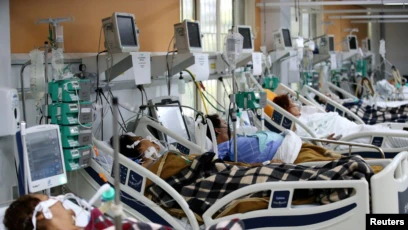

The motivation for this project came from a conversation I had with my roommate who is a nurse here in San Francisco who worked on a COVID unit during the pandemic. She told me that one of the biggest factors leading to inadequate care was the lack of hospital resources. Without proper resources, sick people were not able to receieve proper care. One of major contributing factors to this came from not knowing how long a patient would be hospitalized for when they are admitted. With such a huge influx of long-term residential patients, hospitals were quickly drained of resources such as PPE, certain medications, and even beds themselves. 

Predictive modeling has many applications in the healthcare field and I wanted to use this projet as an opportunity to show how machine learning could be used to help alleviate the burden of this type of issue in the future. In this project, I build a classifier model that can be used to predict the length of stay (LOS) of a COVID-19 patient given certain predictive features. With further research and implementation, classifiers like these could be used in emergency situations to properly allocate resources based on predictive knowledge of how long a patient is expected to admitted for. 

## Data Understanding

Stakeholder: Analytics team for a group of hospitals looking to predict length of stay (LOS) estimates for COVID-19 inpatients. 

Problem: Effectively predict the length of stay of a COVID-19 patient given similar past patient profiles. 

My data came from a series of analytic healthcare data provided on Kaggle by Vidhya Healthcare Analytics to be used as a means of building and sharing predictive models for COVID-19 related projects.

The data was collected ananymously in order to protect the identity of the individuals.

### Imports

In [60]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

### Read COVID-19 Train Data

In [2]:
df_train = pd.read_csv('COVID-19_Train.csv')
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


### Data Exploration

In [3]:
# Check shape --> there are 318,248 patient entries and 18 feature columns including my target 'Stay'

df_train.shape

(318438, 18)

In [4]:
# Get info --> quick summary of what I am working with 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
# Get data types --> int, float, and objects 

df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [6]:
df_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
# Some features seem to have some skew and the low minumum values should be checked as outliers. 

In [7]:
# Check missing values --> Bed Grade & City_Code_Patient 

df_train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

### Data Cleaning: First Steps

In [8]:
# Check for duplicates 

df_train.duplicated().sum()

0

In [9]:
# Fill 'Bed Grade' and 'City_Code_Patient' missing values with mode due to outliers causing skew in data 

df_train['Bed Grade'].fillna(df_train['Bed Grade'].mode()[0], inplace=True)
df_train['City_Code_Patient'].fillna(df_train['City_Code_Patient'].mode()[0], inplace=True)

df_train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [10]:
# Drop unnecessary columns -- both do not provide any predictive aspect for this modeling (only provides info about pateint ID) 

df_train.drop(['case_id', 'patientid'], axis=1, inplace=True)
df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [11]:
# Split data into numerical and categorical categories 

num_data = df_train[['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']]
cat_data = df_train[['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']]


### Exploratory Data Analysis (EDA)

Want to do more Visualizations once I complete the modeling steps. 

/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

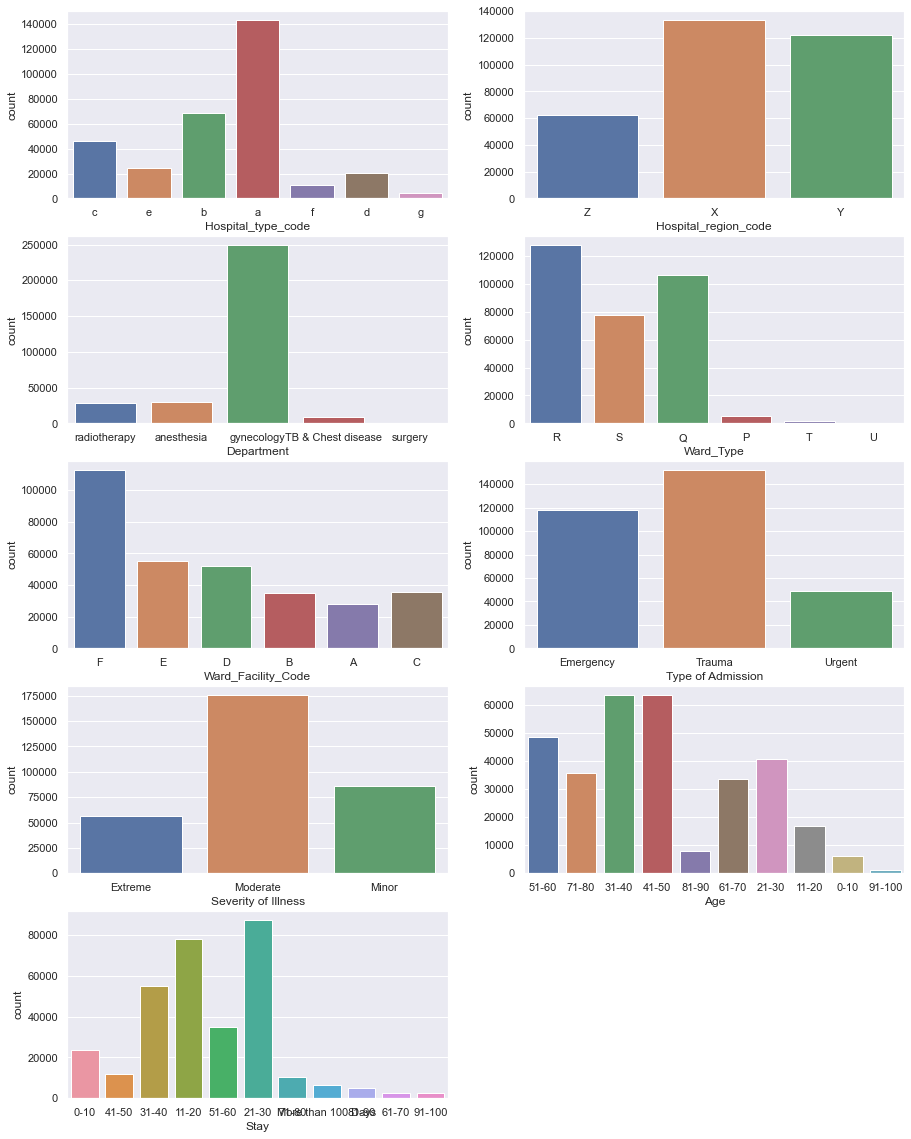

In [12]:
# Categorical data quick analysis 

i=1
plt.figure(figsize=(15,20))
for col in cat_data:
    plt.subplot(5,2,i)
    sns.countplot(df_train[col])
    i=i+1
plt.show()

/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andrewmarinelli/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

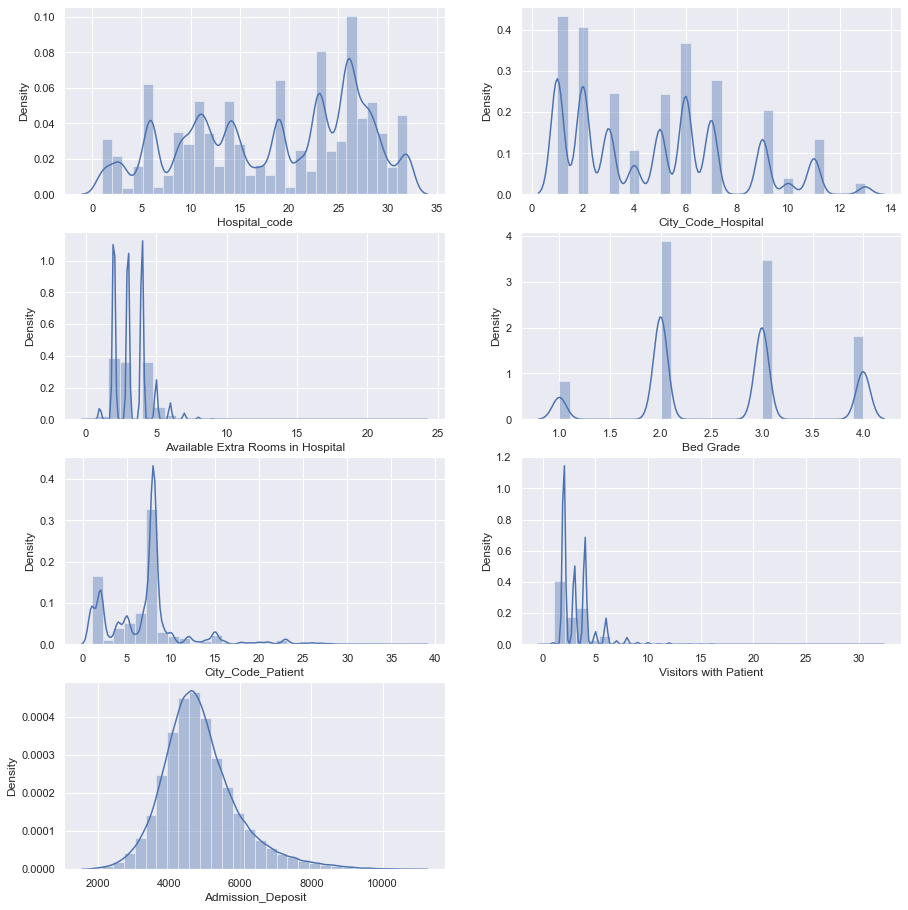

In [13]:
# Numerical data quick analysis 

i=1
plt.figure(figsize=(15,20))
for col in num_data:
    plt.subplot(5,2,i)
    sns.distplot(df_train[col], bins=30)
    i=i+1
plt.show()

# df.hist(bins=30, figsize=(15, 10))

In [14]:
df_train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

### Label Encoding Categorical Data

In [15]:
labels = LabelEncoder()

for col in cat_data:
    df_train[col]= labels.fit_transform(df_train[col])

df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,7.0,1,0,2,5,7272.0,4
4,26,1,2,1,2,3,3,3,2.0,7.0,1,0,2,5,5558.0,4


<AxesSubplot:>

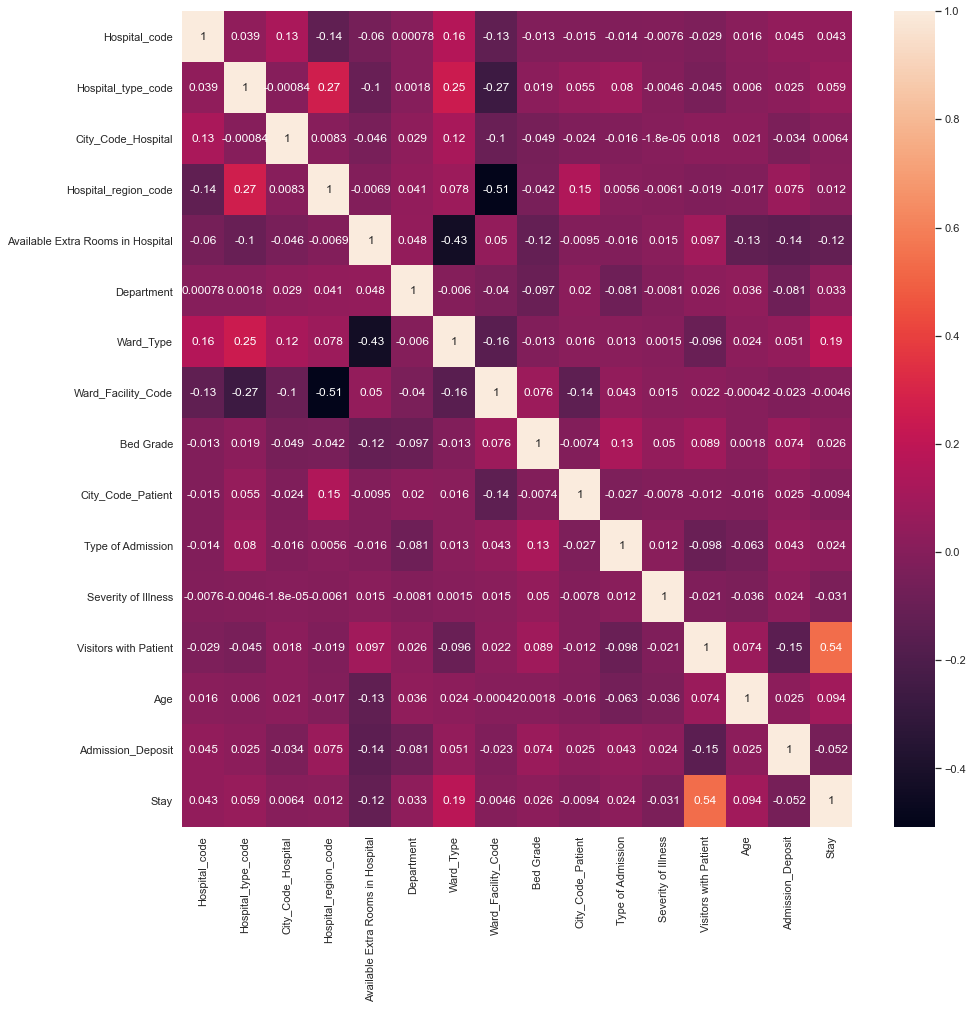

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True)

### Scaling Numerical Data 

In [17]:
scaler = StandardScaler()

for col in num_data:
    df_train[col]= scaler.fit_transform(df_train[col].values.reshape(-1,1))

df_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,-0.571055,2,-0.169177,3,2,5,-0.716535,-0.055708,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,0.073580,2,-1.025217,3,3,5,-0.716535,-0.055708,1,0,-0.727923,5,0.987556,4
2,-0.963527,4,-1.215691,0,-1.025217,1,3,4,-0.716535,-0.055708,1,0,-0.727923,5,-0.124910,3
3,0.889668,1,-0.893373,1,-1.025217,3,2,3,-0.716535,-0.055708,1,0,-0.727923,5,2.200319,4
4,0.889668,1,-0.893373,1,-1.025217,3,3,3,-0.716535,-0.055708,1,0,-0.727923,5,0.623175,4


### Train-Test Split

In [25]:
y = df_train['Stay']
X = df_train.drop('Stay', axis=1)

#print(y)
#print(X)

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

### Model 1: Decision Tree

In [41]:
dt_clf = DecisionTreeClassifier()
dt_model = dt_clf.fit(X_train, y_train)

dt_y_preds = dt_clf.predict(X_test)

In [46]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, dt_y_preds))

accuracy = accuracy_score(y_test, dt_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.19      0.20      0.19      4721
           1       0.35      0.34      0.35     15628
           2       0.39      0.38      0.38     17498
           3       0.24      0.25      0.25     11032
           4       0.06      0.06      0.06      2349
           5       0.30      0.30      0.30      7004
           6       0.02      0.02      0.02       549
           7       0.16      0.17      0.16      2051
           8       0.22      0.22      0.22       967
           9       0.10      0.10      0.10       553
          10       0.35      0.36      0.35      1336

    accuracy                           0.30     63688
   macro avg       0.22      0.22      0.22     63688
weighted avg       0.30      0.30      0.30     63688

0.2978426077125989


### Model 2: Random Forest

In [43]:
rf_clf = RandomForestClassifier()
rf_model = rf_clf.fit(X_train, y_train)

rf_y_preds = rf_clf.predict(X_test)

In [47]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, rf_y_preds))

accuracy = accuracy_score(y_test, rf_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.28      0.18      0.22      4721
           1       0.39      0.44      0.42     15628
           2       0.41      0.54      0.47     17498
           3       0.33      0.27      0.30     11032
           4       0.08      0.02      0.03      2349
           5       0.39      0.45      0.42      7004
           6       0.06      0.01      0.02       549
           7       0.27      0.10      0.14      2051
           8       0.39      0.20      0.26       967
           9       0.23      0.05      0.08       553
          10       0.55      0.46      0.50      1336

    accuracy                           0.38     63688
   macro avg       0.31      0.25      0.26     63688
weighted avg       0.36      0.38      0.37     63688

0.3833375204120085


### Model 3: KNeighbors 

In [45]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)

knn_y_preds = knn_clf.predict(X_test)

In [48]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, knn_y_preds))

accuracy = accuracy_score(y_test, knn_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.18      0.18      0.18      4721
           1       0.34      0.46      0.39     15628
           2       0.39      0.47      0.43     17498
           3       0.29      0.22      0.25     11032
           4       0.09      0.02      0.03      2349
           5       0.36      0.30      0.32      7004
           6       0.11      0.01      0.01       549
           7       0.18      0.06      0.09      2051
           8       0.28      0.11      0.15       967
           9       0.14      0.02      0.04       553
          10       0.56      0.31      0.40      1336

    accuracy                           0.34     63688
   macro avg       0.27      0.20      0.21     63688
weighted avg       0.32      0.34      0.32     63688

0.33839969853033536


### Model 4: XGBoost

In [37]:
xgb_clf = XGBClassifier()
xgb_model = xgb_clf.fit(X_train, y_train)

xgb_y_preds = xgb_clf.predict(X_test)

In [49]:
# print(confusion_matrix(y_test, rf_y_preds))
print(classification_report(y_test, xgb_y_preds))

accuracy = accuracy_score(y_test, xgb_y_preds)
print(accuracy)

              precision    recall  f1-score   support

           0       0.37      0.16      0.22      4721
           1       0.43      0.50      0.47     15628
           2       0.42      0.66      0.52     17498
           3       0.42      0.22      0.29     11032
           4       0.19      0.00      0.01      2349
           5       0.40      0.49      0.44      7004
           6       0.08      0.00      0.00       549
           7       0.38      0.04      0.07      2051
           8       0.37      0.23      0.28       967
           9       0.23      0.02      0.04       553
          10       0.55      0.42      0.48      1336

    accuracy                           0.42     63688
   macro avg       0.35      0.25      0.26     63688
weighted avg       0.41      0.42      0.39     63688

0.4232822509734958


In [57]:
# Feature importance function taken from class lecture 

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

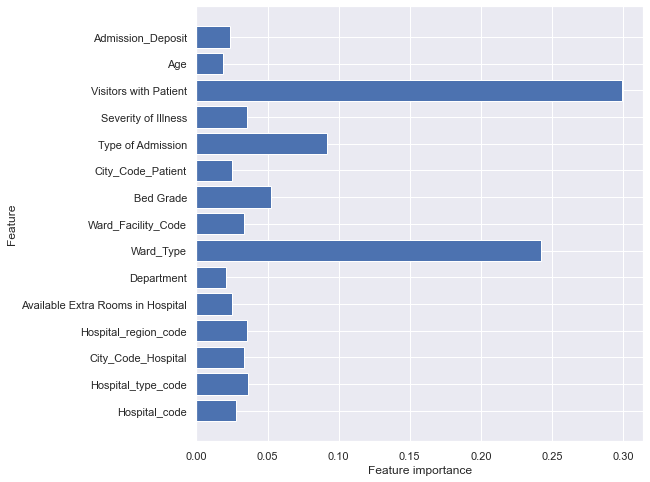

In [58]:
plot_feature_importances(xgb_clf)

This will be interesting to discuss in my findings and limitations. Also curious to mess around with removing visitors with patient. Will look into this more.

I also am interested in doing some feature engineering. 

### XGBoost Hyperparameter Tuning

In [ ]:
param_grid = {
    #'learning_rate': [0.02, 0.1, 0.2, 0.3]
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.6, 0.8, 1.0],
    #'n_estimators': [100, 200, 500, 600],
}

grid_xgb = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

### Results

Need to continue working on hyperparameters since what I've had so far was taking too long. Will look into more fine-tuning here...But without hyperparamters a 42.3% accuracy score which is low but in the context of the problem can still have an impact. 

### Future Research